In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime 
import locale
locale.setlocale(locale.LC_ALL, 'ko_KR.UTF-8')

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

In [2]:
hj = pd.read_excel('급속충전이용내역_환경부_18.01-19.10.xlsx', encoding = "CP949")
hg = pd.read_excel('급속충전이용내역_한전_18.01-19.10.xlsx', encoding = "CP949")

In [3]:
temp = hj.loc[:, ['충전소명', '설치년도']]

In [4]:
temp2 = temp.drop_duplicates(['충전소명'], keep = 'first')
temp2.groupby(['설치년도']).size()

설치년도
2010     1
2011     1
2012     4
2013     4
2014     1
2016     2
2017    11
2018    35
dtype: int64

In [5]:
temp2

,충전소명,설치년도
0,연세대학교 국제캠퍼스,2017
1,중부지방고용노동청 별관 앞,2017
2,강화풍물시장 공영주차장,2017
3,영종대교 휴게소 주차장,2017
7,검단2공영주차장,2017
11,계산1택지 공영주차장,2017
15,도원역 부근 공영주차장,2017
16,롯데마트 부평역점,2017
19,부원 공영주차장,2017
40,㈜현대자동차 블루핸즈 서인천 서비스 주차장 입구,2017


In [6]:
len(temp2['충전소명'].unique())

59

In [7]:
temp3 = hg.loc[: , ['충전소', '충전소 구축일']]
temp4 = temp3.drop_duplicates(['충전소'], keep = 'first')
temp4['설치년도'] = list(map(lambda x : x.split('-')[0], temp4['충전소 구축일']))
temp4.groupby(['설치년도']).size()

설치년도
2016      2
2017    100
2018      8
dtype: int64

In [8]:
temp2.groupby(['설치년도']).size()

설치년도
2010     1
2011     1
2012     4
2013     4
2014     1
2016     2
2017    11
2018    35
dtype: int64

In [9]:
hj.head(1)

,번호,충전소대분류,충전소명,주소,설치년도,충전기타입,충전량(kWh),충전시작시간,충전종료시간
0,1,교육문화시설,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,2017,DC차데모+AC3상+DC콤보,7.02,20180101032052,20180101034847


In [10]:
hg.head(1)

,번호,용도별,충전소,주소,충전소 구축일,충전구분,충전량(kWh),시작일시
0,1,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,17.21,2018-01-01 09:19:36


In [11]:
hj2 = hj.copy()
hg2 = hg.copy()

hj2.rename(columns = {
    '충전소명' : '충전소',
    '충전소대분류' : '용도',
    '충전시작시간' : '충전날짜',
    '충전량(kWh)' : '충전량_kWh'
}, inplace = True)

hg2.rename(columns = {
    '용도별' : '용도',
    '충전소 구축일' : '설치년도',
    '시작일시' : '충전날짜',
    '충전량(kWh)' : '충전량_kWh'
}, inplace = True)

In [12]:
hj2 = hj2.loc[:, ['충전소', '주소', '용도', '충전량_kWh', '충전날짜']]
hg2 = hg2.loc[:, ['충전소', '주소', '용도', '충전량_kWh', '충전날짜']]

In [13]:
hj2.head(1)

,충전소,주소,용도,충전량_kWh,충전날짜
0,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,교육문화시설,7.02,20180101032052


In [14]:
hg2.head(1)

,충전소,주소,용도,충전량_kWh,충전날짜
0,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,17.21,2018-01-01 09:19:36


In [15]:
hj2['충전날짜'] = list(map(lambda x : str(x), hj2['충전날짜'] ))
hj2['충전날짜'] = list(map(lambda x : x[2:10], hj2['충전날짜'] ))
hj2.head(1)

,충전소,주소,용도,충전량_kWh,충전날짜
0,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,교육문화시설,7.02,18010103


In [16]:
hg2['충전날짜'] = list(map(lambda x : x.split(' ')[0].replace('-', '')[2:] + x.split(' ')[1].replace(':', '')[:2], hg2['충전날짜'] ))
hg2.head(1)

,충전소,주소,용도,충전량_kWh,충전날짜
0,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,17.21,18010109


In [17]:
hj2['연도'] = list(map(lambda x : x[:2], hj2['충전날짜']))
hj2['연월'] = list(map(lambda x : x[:4], hj2['충전날짜']))
hj2['연월일'] = list(map(lambda x : x[:6], hj2['충전날짜']))
hj2['월'] = list(map(lambda x : x[2:4], hj2['충전날짜']))
hj2['시간'] = list(map(lambda x : x[6:], hj2['충전날짜']))
hj2['시간'] = list(map(lambda x : int(x) , hj2['시간']))
hj2.head(10)

,충전소,주소,용도,충전량_kWh,충전날짜,연도,연월,연월일,월,시간
0,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,교육문화시설,7.02,18010103,18,1801,180101,01,3
1,중부지방고용노동청 별관 앞,인천광역시 남동구 구월3동 1111-6 중부지방고용노동청 별관 앞,공공시설,2.05,18010104,18,1801,180101,01,4
2,강화풍물시장 공영주차장,인천광역시 강화군 강화읍 갑곳리 849 고엽제전우회 건물 옆,주차시설,16.95,18010104,18,1801,180101,01,4
3,영종대교 휴게소 주차장,인천광역시 서구 경서동 산 257-4 지상 버스주차장 옆,휴게시설,16.50,18010105,18,1801,180101,01,5
4,영종대교 휴게소 주차장,인천광역시 서구 경서동 산 257-4 지상 버스주차장 옆,휴게시설,14.41,18010107,18,1801,180101,01,7
5,강화풍물시장 공영주차장,인천광역시 강화군 강화읍 갑곳리 849 고엽제전우회 건물 옆,주차시설,15.82,18010108,18,1801,180101,01,8
6,강화풍물시장 공영주차장,인천광역시 강화군 강화읍 갑곳리 849 고엽제전우회 건물 옆,주차시설,4.80,18010108,18,1801,180101,01,8
7,검단2공영주차장,인천광역시 서구 당하동 1097-5 검단4동 주민센터 옆,주차시설,5.78,18010109,18,1801,180101,01,9
8,영종대교 휴게소 주차장,인천광역시 서구 경서동 산 257-4 지상 버스주차장 옆,휴게시설,23.48,18010108,18,1801,180101,01,8
9,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,교육문화시설,7.04,18010109,18,1801,180101,01,9


In [18]:
hg2['연도'] = list(map(lambda x : x[:2], hg2['충전날짜']))
hg2['연월'] = list(map(lambda x : x[:4], hg2['충전날짜']))
hg2['연월일'] = list(map(lambda x : x[:6], hg2['충전날짜']))
hg2['월'] = list(map(lambda x : x[2:4], hg2['충전날짜']))
hg2['시간'] = list(map(lambda x : x[6:], hg2['충전날짜']))
hg2['시간'] = list(map(lambda x : int(x) , hg2['시간']))
hg2.head(10)

,충전소,주소,용도,충전량_kWh,충전날짜,연도,연월,연월일,월,시간
0,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,17.21,18010109,18,1801,180101,01,9
1,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,12.86,18010209,18,1801,180102,01,9
2,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,16.10,18010414,18,1801,180104,01,14
3,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,13.94,18010912,18,1801,180109,01,12
4,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,16.06,18010920,18,1801,180109,01,20
5,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,12.33,18012019,18,1801,180120,01,19
6,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,20.21,18012113,18,1801,180121,01,13
7,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,11.76,18012115,18,1801,180121,01,15
8,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,15.88,18012116,18,1801,180121,01,16
9,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,39.59,18012419,18,1801,180124,01,19


In [19]:
use_ch = pd.concat([hg2, hj2], axis = 0, ignore_index = True)
print(use_ch.shape)
use_ch.head(5)

(93943, 10)


,충전소,주소,용도,충전량_kWh,충전날짜,연도,연월,연월일,월,시간
0,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,17.21,18010109,18,1801,180101,01,9
1,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,12.86,18010209,18,1801,180102,01,9
2,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,16.10,18010414,18,1801,180104,01,14
3,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,13.94,18010912,18,1801,180109,01,12
4,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,16.06,18010920,18,1801,180109,01,20


In [20]:
import datetime 
import locale
locale.setlocale(locale.LC_ALL, 'ko_KR.UTF-8')

#날짜를 data 형식으로 변환
use_ch['충전날짜'] = list(map(lambda x : '20' + x, use_ch['충전날짜']))
use_ch['충전날짜'] = list(map(lambda x : datetime.date( int(x[:4]) , int(x[4:6]) , int(x[6:8])), use_ch['충전날짜']))

#날짜로 요일 추적
use_ch['요일'] = list(map(lambda x : x.strftime('%A'), use_ch['충전날짜']))
use_ch['요일'] = list(map(lambda x : x[:1], use_ch['요일']))
use_ch.head(5)

,충전소,주소,용도,충전량_kWh,충전날짜,연도,연월,연월일,월,시간,요일
0,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,17.21,2018-01-01,18,1801,180101,01,9,월
1,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,12.86,2018-01-02,18,1801,180102,01,9,화
2,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,16.10,2018-01-04,18,1801,180104,01,14,목
3,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,13.94,2018-01-09,18,1801,180109,01,12,화
4,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,16.06,2018-01-09,18,1801,180109,01,20,화


In [21]:
print( use_ch.shape)
use_ch.head()

(93943, 11)


,충전소,주소,용도,충전량_kWh,충전날짜,연도,연월,연월일,월,시간,요일
0,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,17.21,2018-01-01,18,1801,180101,01,9,월
1,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,12.86,2018-01-02,18,1801,180102,01,9,화
2,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,16.10,2018-01-04,18,1801,180104,01,14,목
3,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,13.94,2018-01-09,18,1801,180109,01,12,화
4,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,16.06,2018-01-09,18,1801,180109,01,20,화


In [22]:
use_ch18 = use_ch[use_ch['연도'] == '18']
use_ch19 = use_ch[use_ch['연도'] == '19']

In [23]:
use_ch18.head()

,충전소,주소,용도,충전량_kWh,충전날짜,연도,연월,연월일,월,시간,요일
0,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,17.21,2018-01-01,18,1801,180101,01,9,월
1,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,12.86,2018-01-02,18,1801,180102,01,9,화
2,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,16.10,2018-01-04,18,1801,180104,01,14,목
3,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,13.94,2018-01-09,18,1801,180109,01,12,화
4,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,16.06,2018-01-09,18,1801,180109,01,20,화


In [24]:
use_ch19.head()

,충전소,주소,용도,충전량_kWh,충전날짜,연도,연월,연월일,월,시간,요일
302,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,24.28,2019-01-01,19,1901,190101,01,8,화
303,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,37.83,2019-01-03,19,1901,190103,01,13,목
304,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,42.90,2019-01-04,19,1901,190104,01,20,금
305,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,29.06,2019-01-05,19,1901,190105,01,9,토
306,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,18.44,2019-01-06,19,1901,190106,01,8,일


In [25]:
print(len(use_ch18), len(use_ch19))

34473 59470


In [26]:
len(use_ch19)/len(use_ch18)

1.7251182084529921

In [27]:
sum(use_ch18['충전량_kWh'])

604401.3740000017

In [28]:
sum(use_ch19['충전량_kWh'])

1132038.094000026

In [29]:
sum(use_ch19['충전량_kWh'])/ sum(use_ch18['충전량_kWh'])

1.872990603095523

In [30]:
sum(use_ch19['충전량_kWh'])/9

125782.01044444733

In [31]:
sum(use_ch18['충전량_kWh'])/12

50366.781166666806

In [32]:
(sum(use_ch19['충전량_kWh'])/9) / (sum(use_ch18['충전량_kWh'])/12)

2.497320804127364

In [33]:
day_name = ['월','화', '수', '목', '금', '토', '일']

In [34]:
u18 = use_ch18.groupby(['요일']).size()
u18_df = pd.DataFrame(u18.loc[day_name], columns = ['빈도'])
u18_df['요일'] = u18_df.index
u18_df.index = range(len(u18_df))
u18_df = u18_df.iloc[: , [1,0]]
u18_df

,요일,빈도
0,월,4777
1,화,4753
2,수,4950
3,목,4924
4,금,5199
5,토,5244
6,일,4626


In [35]:
u18_df['비율'] = round(u18_df['빈도']/(u18_df['빈도'].sum()) * 100, 2)
u18_df['비율'] = list(map(lambda x : str(x) + '%', u18_df['비율']))
u18_df

,요일,빈도,비율
0,월,4777,13.86%
1,화,4753,13.79%
2,수,4950,14.36%
3,목,4924,14.28%
4,금,5199,15.08%
5,토,5244,15.21%
6,일,4626,13.42%


In [36]:
u19 = use_ch19.groupby(['요일']).size()
u19_df = pd.DataFrame(u19.loc[day_name], columns = ['빈도'])
u19_df['요일'] = u19_df.index
u19_df.index = range(len(u19_df))
u19_df = u19_df.iloc[: , [1,0]]
u19_df

,요일,빈도
0,월,8215
1,화,8509
2,수,8460
3,목,8572
4,금,8912
5,토,8731
6,일,8071


In [37]:
u19_df['비율'] = round(u19_df['빈도']/(u19_df['빈도'].sum()) * 100, 2)
u19_df['비율'] = list(map(lambda x : str(x) + '%', u19_df['비율']))
u19_df

,요일,빈도,비율
0,월,8215,13.81%
1,화,8509,14.31%
2,수,8460,14.23%
3,목,8572,14.41%
4,금,8912,14.99%
5,토,8731,14.68%
6,일,8071,13.57%


In [38]:
u18_df2 = u18_df.copy()
u19_df2 = u19_df.copy()

u18_df2['요일'] = list(map(lambda x : '2018_' + x, u18_df2['요일']))
u19_df2['요일'] = list(map(lambda x : '2019_' + x, u19_df2['요일']))


In [39]:
u18_df2

,요일,빈도,비율
0,2018_월,4777,13.86%
1,2018_화,4753,13.79%
2,2018_수,4950,14.36%
3,2018_목,4924,14.28%
4,2018_금,5199,15.08%
5,2018_토,5244,15.21%
6,2018_일,4626,13.42%


In [40]:
u19_df2

,요일,빈도,비율
0,2019_월,8215,13.81%
1,2019_화,8509,14.31%
2,2019_수,8460,14.23%
3,2019_목,8572,14.41%
4,2019_금,8912,14.99%
5,2019_토,8731,14.68%
6,2019_일,8071,13.57%


In [41]:
u_df = pd.concat([u18_df2, u19_df2])
u_df

,요일,빈도,비율
0,2018_월,4777,13.86%
1,2018_화,4753,13.79%
2,2018_수,4950,14.36%
3,2018_목,4924,14.28%
4,2018_금,5199,15.08%
5,2018_토,5244,15.21%
6,2018_일,4626,13.42%
0,2019_월,8215,13.81%
1,2019_화,8509,14.31%
2,2019_수,8460,14.23%


In [42]:
u_M = u_df['빈도'].max()
u_M 

8912

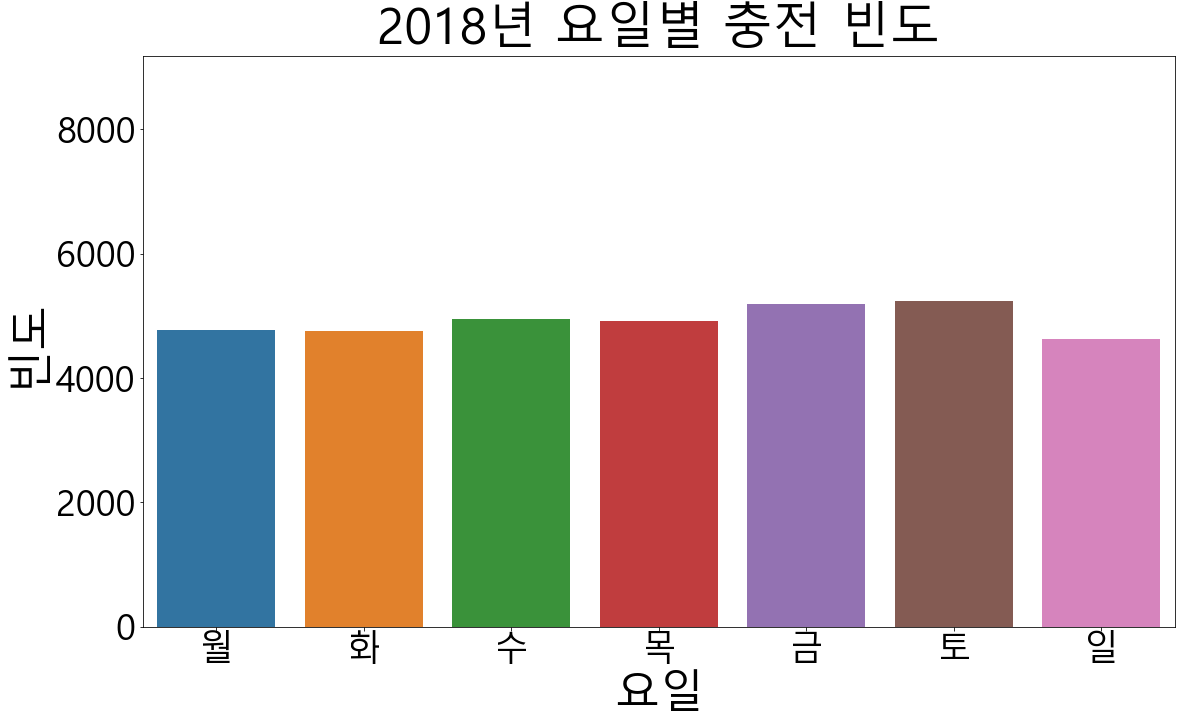

In [43]:
sns.barplot(x = '요일', y = '빈도', data = u18_df)#, color = 'RoyalBlue')
plt.title('2018년 요일별 충전 빈도', fontsize = 50)

plt.xlabel('요일', fontsize = 45)
plt.ylabel('빈도', fontsize = 45)

plt.xticks(fontsize = 36)
plt.yticks(fontsize = 36)

plt.ylim(0, u_M * 1.03)

fig = plt.gcf()
fig.set_size_inches(18.5,10.5)

plt.show()

fig.savefig( r'C:\Users\USER\Desktop\전기차\12.31 18년 19년 요일별 빈도\2018년 요일별 충전빈도.jpg',     
            bbox_inches='tight', dpi= 'figure' ,progressive = True)

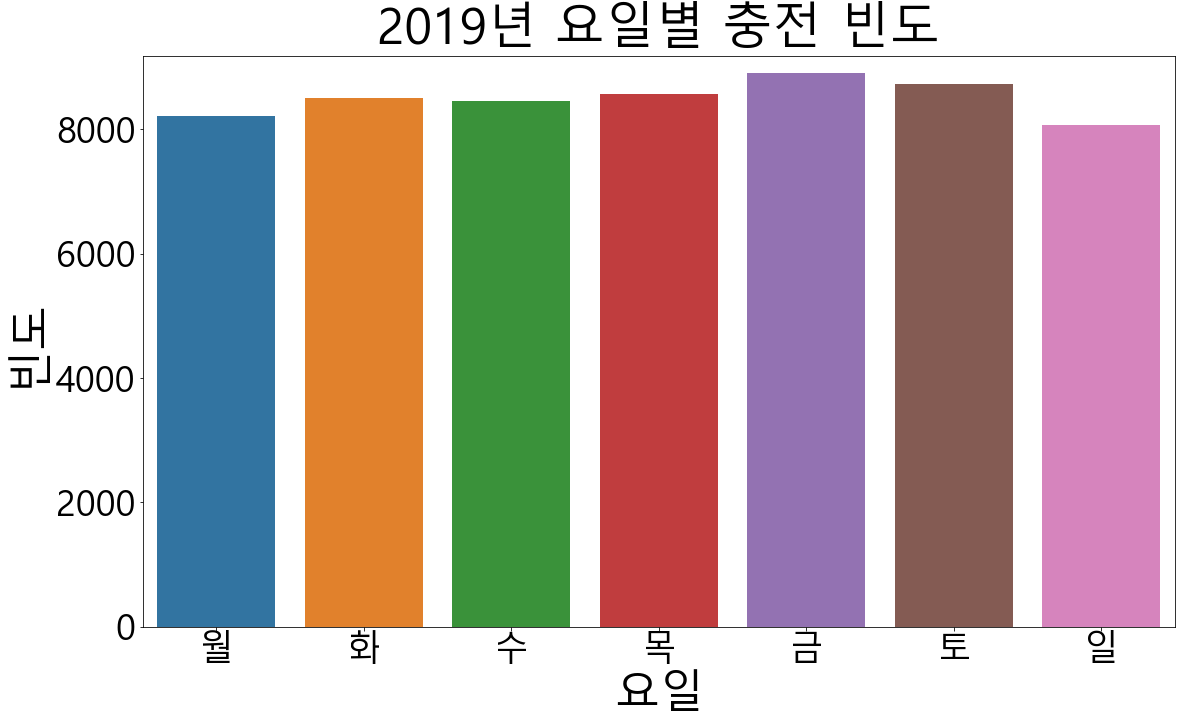

In [44]:
sns.barplot(x = '요일', y = '빈도', data = u19_df)#, color = 'RoyalBlue')

plt.title('2019년 요일별 충전 빈도', fontsize = 50)

plt.xlabel('요일', fontsize = 45)
plt.ylabel('빈도', fontsize = 45)

plt.xticks(fontsize = 36)
plt.yticks(fontsize = 36)

plt.ylim(0, u_M * 1.03)

fig = plt.gcf()
fig.set_size_inches(18.5,10.5)

plt.show()

fig.savefig( r'C:\Users\USER\Desktop\전기차\12.31 18년 19년 요일별 빈도\2019년 요일별 충전빈도.jpg',     
            bbox_inches='tight', dpi= 'figure' ,progressive = True)

In [45]:
#u18_df.to_csv("12.31 2018년 요일별 충전빈도.csv", encoding = "CP949", index = False)
#u19_df.to_csv("12.31 2019년 요일별 충전빈도.csv", encoding = "CP949", index = False)
#u_df.to_csv("12.31 2018~2019년 요일별 충전빈도.csv", encoding = "CP949", index = False)